# Machine Learning

Now we're going to try and use machine learning to predict the Popularity Category of a track using the features in our DataFrame.




First we, import our dataset that we created

In [1]:
import pandas as pd
df = pd.read_csv('/content/output.csv')
df = df.iloc[: , 1:]

df

,Title,Popularity,Artist,Album,Number of Tracks in Album,Related Artists,Explicit,Average Duration of Segments,brightness,flatness,...,liveness,valence,tempo,duration,time_signature,fade in,fade out,info,Lyrics,Popularity Categories
0,God's Plan,83.0,Drake,Scorpion,25,"Big Sean, J. Cole, DJ Khaled, Meek Mill, Futur...",Explicit,231.890759,39.845464,21.759221,...,0.552,0.357,77.169,3.316217,4,0.000000,0.068333,Drake may refer to:,"Yeah, they wishin' and wishin' and wishin' and...",High
1,Lucid Dreams,83.0,Juice WRLD,Goodbye & Good Riddance,17,"NAV, Comethazine, Trippie Redd, Lil Tecca, Blu...",Explicit,250.671292,26.918125,-22.883286,...,0.340,0.218,83.903,3.997267,4,0.000314,0.054277,"Jarad Anthony Higgins (December 2, 1998 – Dece...","Enviyon on the mix No, no, no, no No, no, no,...",High
2,SICKO MODE,81.0,Travis Scott,ASTROWORLD,17,"A$AP Rocky, A$AP Ferg, Chief Keef, Joey Bada$$...",Explicit,236.685634,58.408027,-24.692282,...,0.124,0.446,155.008,5.213667,4,0.000000,0.018448,"Jacques Bermon Webster II (born April 30, 1991...","Astro' Yeah Sun is down, freezing cold That's...",High
3,a lot,80.0,21 Savage,i am > i was,15,"Quavo, Gunna, Young Thug, Don Toliver, Huncho ...",Explicit,283.760186,10.461452,-52.394945,...,0.342,0.274,145.972,4.810400,4,0.000229,0.044449,"Shéyaa Bin Abraham-Joseph (born October 22, 19...",I love you Turn my headphone down a little bit...,High
4,Plug Walk,69.0,Rich The Kid,The World Is Yours,15,"Quality Control, Famous Dex, Baka Not Nice, Yu...",Explicit,223.249444,24.667761,6.185388,...,0.108,0.158,94.981,2.920500,4,0.000565,0.108696,"Dimitri Leslie Roger (born July 13, 1992),[3][...","Ayy, ayy, plug walk (plug walk, plug, plug) I ...",Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,OD,32.0,Earl Sweatshirt,FEET OF CLAY,7,"MellowHype, Domo Genesis, Vince Staples, Mike ...",Explicit,258.737655,36.678746,-10.348722,...,0.134,0.458,123.287,1.584617,1,0.001159,-0.000003,"Thebe Neruda Kgositsile (born February 24, 199...","Give it up, we Somebody tooted in the student...",Low
114,Lost and Found,19.0,Domo Genesis,Genesis,12,"MellowHype, Mike G, MellowHigh, Jet Age of Tom...",Explicit,262.822182,29.689132,-47.382963,...,0.104,0.725,97.017,2.560667,4,0.000000,0.068005,"Dominique Marquis Cole (born March 9, 1991), k...",Some of those you can take off though I don't ...,Low
115,Gwendolynn's Apprehension,46.0,Mick Jenkins,Pieces of a Man,17,"Saba, Pivot Gang, Kirk Knight, Rejjie Snow, AK...",Explicit,264.972310,9.048543,-10.534785,...,0.120,0.680,91.352,3.758883,4,0.000438,0.037645,Mick Jenkins may refer to:,"We, real cool We, left school We, lurk late We...",Low
116,Truman,35.0,Lil Dicky,Professional Rapper,20,"VIC MENSA, Bryce Vine, Chris Webby, Hoodie All...",Explicit,287.618539,1.527897,13.110137,...,0.339,0.636,88.748,10.242733,4,0.000133,0.010241,"David Andrew Burd (born March 15, 1988), bette...",Ay Man Man Ay I guess ya'll on board Young ma...,Low


In [2]:
#importing libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn import svm

df.dropna()

,Title,Popularity,Artist,Album,Number of Tracks in Album,Related Artists,Explicit,Average Duration of Segments,brightness,flatness,...,liveness,valence,tempo,duration,time_signature,fade in,fade out,info,Lyrics,Popularity Categories
0,God's Plan,83.0,Drake,Scorpion,25,"Big Sean, J. Cole, DJ Khaled, Meek Mill, Futur...",Explicit,231.890759,39.845464,21.759221,...,0.552,0.357,77.169,3.316217,4,0.000000,0.068333,Drake may refer to:,"Yeah, they wishin' and wishin' and wishin' and...",High
1,Lucid Dreams,83.0,Juice WRLD,Goodbye & Good Riddance,17,"NAV, Comethazine, Trippie Redd, Lil Tecca, Blu...",Explicit,250.671292,26.918125,-22.883286,...,0.340,0.218,83.903,3.997267,4,0.000314,0.054277,"Jarad Anthony Higgins (December 2, 1998 – Dece...","Enviyon on the mix No, no, no, no No, no, no,...",High
2,SICKO MODE,81.0,Travis Scott,ASTROWORLD,17,"A$AP Rocky, A$AP Ferg, Chief Keef, Joey Bada$$...",Explicit,236.685634,58.408027,-24.692282,...,0.124,0.446,155.008,5.213667,4,0.000000,0.018448,"Jacques Bermon Webster II (born April 30, 1991...","Astro' Yeah Sun is down, freezing cold That's...",High
3,a lot,80.0,21 Savage,i am > i was,15,"Quavo, Gunna, Young Thug, Don Toliver, Huncho ...",Explicit,283.760186,10.461452,-52.394945,...,0.342,0.274,145.972,4.810400,4,0.000229,0.044449,"Shéyaa Bin Abraham-Joseph (born October 22, 19...",I love you Turn my headphone down a little bit...,High
4,Plug Walk,69.0,Rich The Kid,The World Is Yours,15,"Quality Control, Famous Dex, Baka Not Nice, Yu...",Explicit,223.249444,24.667761,6.185388,...,0.108,0.158,94.981,2.920500,4,0.000565,0.108696,"Dimitri Leslie Roger (born July 13, 1992),[3][...","Ayy, ayy, plug walk (plug walk, plug, plug) I ...",Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,OD,32.0,Earl Sweatshirt,FEET OF CLAY,7,"MellowHype, Domo Genesis, Vince Staples, Mike ...",Explicit,258.737655,36.678746,-10.348722,...,0.134,0.458,123.287,1.584617,1,0.001159,-0.000003,"Thebe Neruda Kgositsile (born February 24, 199...","Give it up, we Somebody tooted in the student...",Low
114,Lost and Found,19.0,Domo Genesis,Genesis,12,"MellowHype, Mike G, MellowHigh, Jet Age of Tom...",Explicit,262.822182,29.689132,-47.382963,...,0.104,0.725,97.017,2.560667,4,0.000000,0.068005,"Dominique Marquis Cole (born March 9, 1991), k...",Some of those you can take off though I don't ...,Low
115,Gwendolynn's Apprehension,46.0,Mick Jenkins,Pieces of a Man,17,"Saba, Pivot Gang, Kirk Knight, Rejjie Snow, AK...",Explicit,264.972310,9.048543,-10.534785,...,0.120,0.680,91.352,3.758883,4,0.000438,0.037645,Mick Jenkins may refer to:,"We, real cool We, left school We, lurk late We...",Low
116,Truman,35.0,Lil Dicky,Professional Rapper,20,"VIC MENSA, Bryce Vine, Chris Webby, Hoodie All...",Explicit,287.618539,1.527897,13.110137,...,0.339,0.636,88.748,10.242733,4,0.000133,0.010241,"David Andrew Burd (born March 15, 1988), bette...",Ay Man Man Ay I guess ya'll on board Young ma...,Low


# Feature Selection

Since we're trying to predict the Popularity Category which is a categorical variable, we will use Classifier algorithms on quantitative, categorical, and textual variables.

Our choice of quantitative variables comes from the data visualizations in the previous section: Data Exploration, where we discovered that Number of Tracks in Album, attack strength, danceability, loudness, and speechiness have the greatest correlation to popularity. We manually tested if lower correlation quantitative variables increased the f1 score and it didnt so we didn't take it into further modelling. We manually tested a variety of combinations. 

Through testing, we realized that of the different textual variables: lyrics, info, and Related Artists, Related Artists gives the best predictions. As explained earlier (we gave a hypothesis as to why they werent particularly helpful in an earlier notebook), lyrics and info, while they did improve our f1 score, they didn't do it as well as Related Artists.

We also chose our categorical variables: key, mode, and time signature this way by manually testing various combinations of them. The one with the highest f1 score was having all 3. This makes sense given that key and mode likely correlate well with mood which likely correlates well with popularity. Ditto with time signature (likely to correlate with energy/upbeat/tempo correlating with popularity). 

When creating a pipeline for our machine learning model, we first use a column transformer. This transformer scales the quantitive variables, one hot encodes the categorical variables, and finally uses a Tfidf Vectorizer on the textual variable. Using a for loop, we will determine which scaler (for quantitative variables) gives the best score. We also tried different parameters for TfIDFVectorixer (max words). 

Then a classifier is used; we start with the K Neighbors Classifier.  

To evaluate each of our models, we will be using the f1 micro score. The f1 score combines precision and recall and is calculated using True Positives (TP), False Positives (FP), and False Negatives (FN) using the formula:
f1 micro = Net TP/(Net TP + 1/2(Net FP + Net FN)). The actual f1 calculation will be a bit different than this because we have 3 categories not 2. This is also why the scoring metric is f1 micro and not f1 (because the latter only works when we have 2 categories and the former works with multiclass classification). 



### **KNN Classifier**

In [3]:
quantitative = ["Number of Tracks in Album", "attack strength", "danceability", "loudness", "speechiness"]
categorical = ["key", "mode",  "time_signature"]
textual = ["Related Artists"]

# all the features taken into consideration
all =  quantitative + categorical + textual

scalers = [StandardScaler(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]

# determining which scaler is best
for i in range(len(scalers)):
  col_transformer = make_column_transformer(
      (scalers[i], quantitative),
      (OneHotEncoder(handle_unknown = 'ignore'), categorical),
      (TfidfVectorizer(smooth_idf=False, norm=None, max_features = 5), "Related Artists"),
      remainder = "drop"
  )

  pipeline_k = make_pipeline(
    col_transformer,
    KNeighborsClassifier(n_neighbors=28, metric="manhattan")
  )

  scores = cross_val_score(
    pipeline_k,
    X = df[all],
    y = df["Popularity Categories"],
    scoring = "f1_micro",
    cv = 4,   
  )
  print(scalers[i])
  print(scores.mean())

StandardScaler()
0.5844827586206897
MinMaxScaler()
0.4910919540229885
MaxAbsScaler()
0.5163793103448275
RobustScaler()
0.5589080459770115


Standard Scaler and Robust Scaler give us the best score.

In [4]:
# Best column transformer (using the scaler determined above)
col_transformer = make_column_transformer(
      (StandardScaler(), quantitative),
      (OneHotEncoder(handle_unknown = 'ignore'), categorical),
      (TfidfVectorizer(smooth_idf=False, norm=None, max_features = 5), "Related Artists"),
      remainder = "drop"
  )

The next thing we do is hyperparameter tuning for the K Neighbors Classifier. This is to identify the value of k and distance metric that gives the best predictions.

In [15]:
# Hyperparameter tuning for K Neighbors Classifier
grid_k = GridSearchCV(
    pipeline_k,
    param_grid={"kneighborsclassifier__n_neighbors": range(5,50),
                "kneighborsclassifier__metric": ['euclidean', 'manhattan', 'cosine']    
    },
    scoring = "f1_micro",
    cv = 4,
    return_train_score=True)

grid_k.fit(df[all],df["Popularity Categories"])

print(grid_k.best_params_)
print(grid_k.best_score_)

{'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 31}
0.5928160919540231


<Axes: >

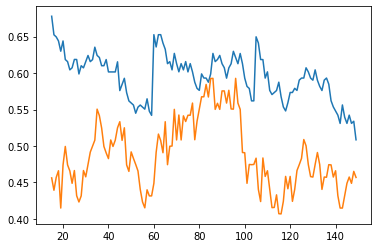

In [16]:
# Plot of hyperparameter tuning for K Neighbors Classifier
pd.Series(grid_k.cv_results_['mean_train_score'], index = range(15,150)).plot.line()
pd.Series(grid_k.cv_results_['mean_test_score'], index = range(15,150)).plot.line()

In [17]:
# Best K Neighbors Classifier pipeline
pipeline_k = make_pipeline(
    col_transformer,
    KNeighborsClassifier(n_neighbors=33, metric="manhattan")
)

From this we see that the optimal value of k is 33, and the best distance metric to use is manhattan. 

Note: The orange line in the graph refers to estimated test error. The peak is roughly near 90, which is nearly 3 times 33. Again, since each choice of k also has an associated 3 different metrics, we have to scale the graph by 3. 

### **Other Classifiers**

The next thing we do is test other classifier models to see which one gives the best predictions. Using a for loop and cross val score with f1 micro scoring metric, we evaluate RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, KNeighborsClassifier, AdaBoostClassifier, and ExtraTreesClassifier

In [18]:
# Testing different classifier models for best training score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier

classifiers = [RandomForestClassifier(), GradientBoostingClassifier(), BaggingClassifier(),  
               KNeighborsClassifier(), AdaBoostClassifier(), ExtraTreesClassifier()] 

for i in range(len(classifiers)):
  pipeline = make_pipeline(
    col_transformer,
    classifiers[i]
  )

  scores = cross_val_score(
    pipeline,
    X = df[all],
    y = df["Popularity Categories"],
    scoring = "f1_micro",
    cv = 4, 

  )

  print(classifiers[i])
  print(scores.mean())

RandomForestClassifier()
0.542816091954023
GradientBoostingClassifier()
0.5008620689655172
BaggingClassifier()
0.5419540229885057
KNeighborsClassifier()
0.45632183908045976
AdaBoostClassifier()
0.4330459770114942
ExtraTreesClassifier()
0.4913793103448276


Top 3 models which give the best score are K Nearest Classifier, RandomForestClassifier, and BaggingClassifier. (Note, in the most recent run of the program before submission, gradient boost did better than KNN, but before that KNN consistenly placed in the top 3)

Now we do hyperparameter tuning for the other two models: RandomForestClassifier and BaggingClassifier to find the best number of estimators.

In [10]:
# Pipeline for Random Forest Classifier
pipeline_rfc = make_pipeline(
    col_transformer,
    RandomForestClassifier(n_estimators=34)
  )

{'randomforestclassifier__n_estimators': 55}
0.610919540229885


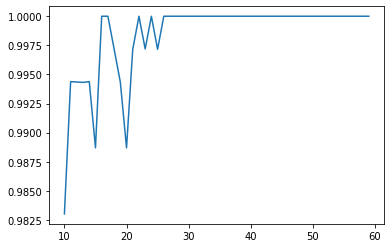

In [11]:
# Hyperparameter Tuning for Random Forest Classifier
grid_rfc = GridSearchCV(
    pipeline_rfc,
    param_grid={"randomforestclassifier__n_estimators": range(10,60)    
    },
    scoring = "f1_micro",
    cv = 4,
    return_train_score=True)

grid_rfc.fit(df[all],df["Popularity Categories"])

pd.Series(grid_rfc.cv_results_['mean_train_score'], index = range(10,60)).plot.line()

print(grid_rfc.best_params_)
print(grid_rfc.best_score_)

In [12]:
#New rfc pipeline
pipeline_rfc = make_pipeline(
    col_transformer,
    RandomForestClassifier(n_estimators=55)
  )

We see that the optimal number of estimators for the RandomForestClassifier is 55.

In [13]:
# Pipeline for Bagging Classifier
pipeline_bag = make_pipeline(
    col_transformer,
    BaggingClassifier()
  )

{'baggingclassifier__n_estimators': 41}
0.6195402298850574


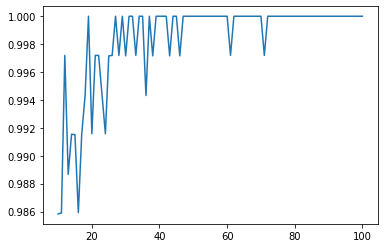

In [14]:
# Hyperparameter tuning for Bagging Classifier
grid_bag = GridSearchCV(
    pipeline_bag,
    param_grid={"baggingclassifier__n_estimators": range(10,101)    
    },
    scoring = "f1_micro",
    cv = 4,
    return_train_score=True)

grid_bag.fit(df[all],df["Popularity Categories"])

pd.Series(grid_bag.cv_results_['mean_train_score'], index = range(10,101)).plot.line()

print(grid_bag.best_params_)
print(grid_bag.best_score_)

In [20]:
# Pipeline for Bagging Classifier
pipeline_bag = make_pipeline(
    col_transformer,
    BaggingClassifier(n_estimators = 41)
  )

We see that the optimal number of estimators for the BaggingClassifier is 41 and is better than both KNN and RFC

After hyperparameter tuning for the top 3 models, we see that Bagging Classifier has the best score overall.

### **XGBoost**

We also tried XGBoost, but it didn't beat Bagging Classifier

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

pipeline2 = make_pipeline(
    col_transformer,
    xgb.XGBClassifier()
)

scores = cross_val_score(
    pipeline2,
    X = df[all],
    y = LabelEncoder().fit_transform(df["Popularity Categories"]),
    scoring = "accuracy",
    cv = 4, 
)

scores[1:].mean()

0.5

### **Ensemble Methods**

After evaluating the different classifier models individually, we next try two ensemble methods which combine the models: Stacking (which uses a logisitic regressor to combine the models) and Voting (which averages the predictions of all the models).

In [21]:
# top 3 classifier models
pipelines = [('knn', pipeline_k), ('rfc', pipeline_rfc), ('bag', pipeline_bag)]

In [22]:
# creating a stacker model using the pairs of pipelines
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

for i in range(len(pipelines)):
  for j in range(len(pipelines)):
    if i == j:
      continue
    estimators = [
      pipelines[i],
      pipelines[j]
    ]

    # stacker model uses Logistic Regression
    clf = StackingClassifier(
      estimators=estimators, final_estimator=LogisticRegression()
    )    

    scores = cross_val_score(
      clf,
      X = df[all],
      y = df["Popularity Categories"],
      scoring = "f1_micro",
      cv = 4, 
    )

    print(pipelines[i][0], pipelines[j][0])
    print(scores.mean())

knn rfc
0.5683908045977012
knn bag
0.5772988505747126
rfc knn
0.6112068965517241
rfc bag
0.6201149425287357
bag knn
0.5341954022988505
bag rfc
0.5942528735632184


From this we see that RFC and bagging classifier stacked have the highest score so far

In [23]:
# creating a voting model using the top 3 classifier models
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[
    ('knn', pipeline_k), ('rfc', pipeline_rfc), ('bag', pipeline_bag)], 
    voting='hard')

scores = cross_val_score(
      vc,
      X = df[all],
      y = df["Popularity Categories"],
      scoring = "f1_micro",
      cv = 4, 
    )

print(scores.mean())

0.5847701149425287


As we can see, the voting method on all 3 models does not score as well. 

Hence, here's the final best pipeline: 

In [25]:
clf_final = StackingClassifier(
      estimators=[('rfc', pipeline_rfc), ('bag', pipeline_bag)], final_estimator=LogisticRegression()
    )

### Conclusion

After trying many models and trying different combinations of features, as well as hyperparamater tuning, we settled on the best model being a stacked model of Random forest classifier and bagging classifier. We used an f1 score because it would optimize both precision and recall and would be a more insightful metric than accuracy. We evaluated this score by estimating test error using cross-validation 

While 62% seems low, its still significant because (1) we had 3 classes not 2 and (2) hip hop popularity is ridiculously hard to predict: it has many subgenres and is a vary diverse genre, different people flock to different rap songs for a variety of reasons and there's often no common denominator for virality.

# Real Life Extension: Testing 

Once we decided on our model, we decided to use it on an emerging artist's new track. Suhas, one of our friends, is an artist who recently released his first hiphop track on Spotify. We used the Spotify API to collect data about his track.

In [24]:
import pandas as pd
dfTest = pd.read_csv('/content/suhas.csv')
dfTest = dfTest.iloc[: , 1:]

dfTest

,Title,Popularity,Artist,Album,Number of Tracks in Album,Related Artists,Explicit,Number of Segments,brightness,flatness,...,mode,speechiness,instrumentalness,liveness,valence,tempo,duration,time_signature,fade in,fade out
0,POPPIN,15,SUHAS,POPPIN,1,"Reyaan Luthra, K4Y, Ronn, Rohan Prakash, Mm Sr...",True,410,55.505144,-42.721707,...,0,0.102,0,0.115,0.423,133.956,101050,4,0.0,98.02304


Once we stored all the information about the track in a DataFrame, we used our model to predict his popularity category.

In [26]:
clf_final.fit(df[all], df["Popularity Categories"])
result = clf_final.predict(dfTest[all])

In [27]:
result

array(['Medium'], dtype=object)

Interestingly, our model predicted medium. However, since popularity remains incredibly difficult to predict, and our model only has around 62% accuracy, we can keep our fingers crossed that he can still make it big!